1. Import data.

In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/TheAncientOwl/Code/data-analysis-tool/server/Date.csv')

df.head()


,Country,EA,EAM,EAF,AFF,ANE,AME,CY,SA,CP,LA,LCP,ARL,AGL
0,Aruba,24.125617,25.060201,22.962485,10.503020,13471.23596,20695.5618,3656.505885,180.0,17824090.07,180.0,4600273.024,2000.0,20.00
1,Afghanistan,43.130001,37.259998,65.769997,22.042897,4300.00000,10450.0000,2164.900000,652860.0,4140568.00,652860.0,1912634.000,7703000.0,379190.00
2,Albania,37.290001,33.720001,42.279999,18.440931,960.00000,2010.0000,4840.500000,28750.0,678196.00,27400.0,140110.000,611346.0,11740.81
3,Andorra,24.125617,25.060201,22.962485,10.503020,0.00000,0.0000,3656.505885,470.0,17824090.07,470.0,4600273.024,830.0,188.30
4,Armenia,25.780001,23.400000,28.650000,13.942312,1070.00000,680.0000,2623.600000,29740.0,334342.00,28470.0,127436.000,445600.0,16773.00


2. Pick features & target.

In [2]:
target = 'Country'
features = list(df.columns)
features.remove(target)

print(f">> Target: '{target}'")
print(f'>> Features: {features}')


>> Target: 'Country'
>> Features: ['EA', 'EAM', 'EAF', 'AFF', 'ANE', 'AME', 'CY', 'SA', 'CP', 'LA', 'LCP', 'ARL', 'AGL']


3. Standardize the data.

In [3]:
from sklearn.preprocessing import StandardScaler

x = df.loc[:, features].values
y = df.loc[:, target].values

x = StandardScaler().fit_transform(x)
features_df = pd.DataFrame(data=x, columns=features)
features_df.head()


,EA,EAM,EAF,AFF,ANE,AME,CY,SA,CP,LA,LCP,ARL,AGL
0,0.135883,0.129240,0.142558,0.167759,1.597492,1.528333,0.116975,-0.741018,1.658643,-0.733747,1.746372,-0.758689,-0.680897
1,1.162897,0.825633,2.159066,1.564839,-0.058606,0.376960,-0.661933,1.645149,-0.167489,1.707495,0.248624,2.037547,2.844892
2,0.847298,0.623561,1.052537,1.128765,-0.661728,-0.571508,0.735250,-0.636568,-0.629559,-0.631935,-0.739156,-0.537436,-0.571909
3,0.135883,0.129240,0.142558,0.167759,-0.835080,-0.797387,0.116975,-0.739958,1.658643,-0.732662,1.746372,-0.759114,-0.679333
4,0.225287,0.034472,0.410476,0.584138,-0.641864,-0.720970,-0.422402,-0.632948,-0.675448,-0.627933,-0.746218,-0.597618,-0.525116


4. Correlation matrix.

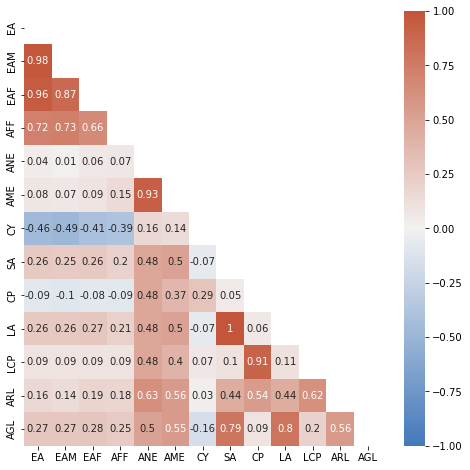

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = features_df.corr().round(2)

plt.figure(figsize=(8, 8))
cmap = sns.diverging_palette(250, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, 
            vmax=1, vmin=-1, center=0,
            cmap=cmap, mask=mask)
plt.show()


5. PCA.

In [5]:
def make_pca_labels(components_count):
  return [f'PC{x}' for x in range(1, components_count + 1)]

make_pca_labels(4)

['PC1', 'PC2', 'PC3', 'PC4']

In [6]:
from sklearn.decomposition import PCA

pca = PCA()

principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(data=principal_components, columns=make_pca_labels(pca.n_components_))
final_df = pd.concat([df[target], principal_df], axis=1)

final_df.head()

,Country,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,Aruba,0.687514,1.366378,-2.388042,1.181771,0.710193,1.121030,1.244253,-0.321712,-0.179210,-0.022713,0.165583,0.002801,0.030613
1,Afghanistan,4.518981,-1.151856,0.964476,-1.035581,-0.478798,-1.175037,-0.994425,-0.611011,-0.931746,-0.083927,-0.242732,-0.029026,0.164823
2,Albania,-0.501471,-2.034472,-0.517829,1.136361,-0.866915,-0.582079,-0.137111,-0.072572,-0.293153,0.079640,-0.011752,0.008512,-0.005317
3,Andorra,-0.736814,0.007391,-2.420072,-0.918297,-0.809982,0.311760,1.054783,-0.430856,-0.213420,-0.109645,0.036907,0.008255,0.007394
4,Armenia,-1.076313,-1.619261,-0.091470,0.207952,0.205972,-0.311406,-0.006345,0.061437,-0.336563,0.150566,-0.031833,-0.000168,-0.022672


6. Pick principal components count.

6.1. *via* Kaiser.

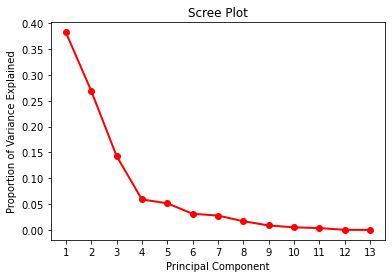

In [7]:
import numpy as np
import matplotlib.pyplot as plt

pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()

6.2. *via* The threshold of variance explained approach *(at least 70%)*.

In [8]:
import numpy as np

explained_variance_ratio = pca.explained_variance_ratio_ * 100
out_sum = np.cumsum(explained_variance_ratio)

variance_ratio_df = pd.DataFrame(data={'Proportion of Variance Explained': list(explained_variance_ratio), 'Cumulative Proportion of Variance Explained': list(out_sum)}, 
                           columns=['Proportion of Variance Explained', 'Cumulative Proportion of Variance Explained'],
                           index=make_pca_labels(pca.n_components_))
variance_ratio_df

,Proportion of Variance Explained,Cumulative Proportion of Variance Explained
PC1,38.252289,38.252289
PC2,26.951622,65.203911
PC3,14.332239,79.536150
PC4,5.908320,85.444471
PC5,5.163437,90.607907
PC6,3.131550,93.739457
PC7,2.785483,96.524940
PC8,1.692023,98.216963
PC9,0.874919,99.091882
PC10,0.504293,99.596175


6.3. *via* Hold onto principal components whose eigenvalues are > 1.

In [9]:
variance_ratio_df = pd.DataFrame(data={'Explained Variance': list(pca.explained_variance_)}, 
                                 columns=['Explained Variance'],
                                 index=make_pca_labels(pca.n_components_))
variance_ratio_df

,Explained Variance
PC1,5.007817
PC2,3.528385
PC3,1.876312
PC4,0.773491
PC5,0.675974
PC6,0.409968
PC7,0.364663
PC8,0.221512
PC9,0.114541
PC10,0.066020


7. Interpret final PCA solution.

7.1. Execute PCA with chosen principal components count

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(data=principal_components, columns=make_pca_labels(pca.n_components_))
final_df = pd.concat([df[target], principal_df], axis=1)

final_df.head()


,Country,PC1,PC2,PC3,PC4
0,Aruba,0.687514,1.366378,-2.388042,1.181771
1,Afghanistan,4.518981,-1.151856,0.964476,-1.035581
2,Albania,-0.501471,-2.034472,-0.517829,1.136361
3,Andorra,-0.736814,0.007391,-2.420072,-0.918297
4,Armenia,-1.076313,-1.619261,-0.091470,0.207952


7.2. Loadings.

In [11]:
loadings = pd.DataFrame(pca.components_.T.round(3), columns=make_pca_labels(pca.n_components_), index=features)
loadings


,PC1,PC2,PC3,PC4
EA,0.283,-0.377,-0.167,0.112
EAM,0.275,-0.377,-0.158,0.075
EAF,0.279,-0.348,-0.155,0.123
AFF,0.248,-0.302,-0.147,0.203
ANE,0.296,0.305,-0.020,0.398
AME,0.304,0.265,0.035,0.486
CY,-0.108,0.320,-0.004,0.494
SA,0.340,0.078,0.405,-0.180
CP,0.138,0.329,-0.467,-0.214
LA,0.342,0.077,0.401,-0.178


In [12]:
# pca general form
for pca_id in range(1, pca.n_components_ + 1):
  print(f'W{pca_id} = ', sep='', end='')
  for feature, row in loadings.iterrows():
    print(f'({row[pca_id - 1]} * {feature})', end=' + ')
  print('\n')

W1 = (0.283 * EA) + (0.275 * EAM) + (0.279 * EAF) + (0.248 * AFF) + (0.296 * ANE) + (0.304 * AME) + (-0.108 * CY) + (0.34 * SA) + (0.138 * CP) + (0.342 * LA) + (0.205 * LCP) + (0.311 * ARL) + (0.351 * AGL) + 

W2 = (-0.377 * EA) + (-0.377 * EAM) + (-0.348 * EAF) + (-0.302 * AFF) + (0.305 * ANE) + (0.265 * AME) + (0.32 * CY) + (0.078 * SA) + (0.329 * CP) + (0.077 * LA) + (0.246 * LCP) + (0.224 * ARL) + (0.081 * AGL) + 

W3 = (-0.167 * EA) + (-0.158 * EAM) + (-0.155 * EAF) + (-0.147 * AFF) + (-0.02 * ANE) + (0.035 * AME) + (-0.004 * CY) + (0.405 * SA) + (-0.467 * CP) + (0.401 * LA) + (-0.496 * LCP) + (-0.153 * ARL) + (0.297 * AGL) + 

W4 = (0.112 * EA) + (0.075 * EAM) + (0.123 * EAF) + (0.203 * AFF) + (0.398 * ANE) + (0.486 * AME) + (0.494 * CY) + (-0.18 * SA) + (-0.214 * CP) + (-0.178 * LA) + (-0.305 * LCP) + (-0.191 * ARL) + (-0.216 * AGL) + 



7.3. Loadings Matrix.

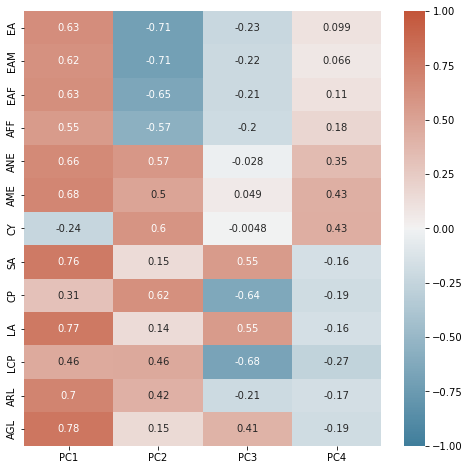

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loadings_matrix = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), columns=make_pca_labels(pca.n_components_), index=features)

plt.figure(figsize=(8, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(loadings_matrix, annot=True, 
            vmax=1, vmin=-1, center=0,
            cmap=cmap)
plt.show()


8. PCs visualize 2D Projection

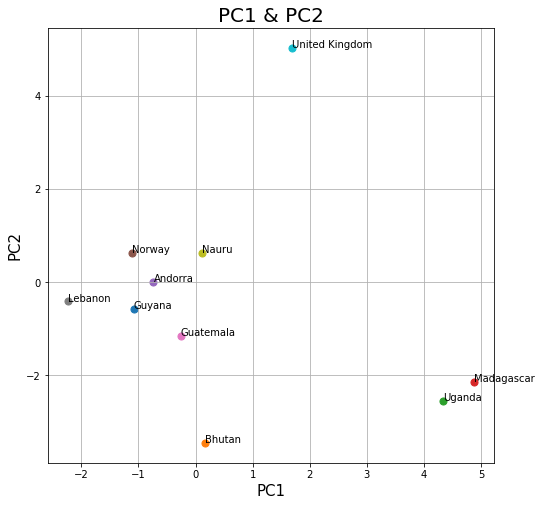

In [14]:
from matplotlib import pyplot as plt
import random

#? @param pc_x: label of x component f'PC{index}'
#? @param pc_y: label of y component f'PC{index}'
#? @param targets: targets to be scattered
#? @param annot: if the scattered plots should have titles
#? @param legend: if the plot should have legend 
def plot_principal_components(pc_x, pc_y, targets, annot=False, legend=False):
  fig = plt.figure(figsize=(8, 8))
  
  ax = fig.add_subplot(1, 1, 1)
  ax.set_xlabel(pc_x, fontsize=15)
  ax.set_ylabel(pc_y, fontsize=15)
  ax.set_title(f'{pc_x} & {pc_y}', fontsize=20)

  for obs in targets:
    indices_to_keep = df[target] == obs

    x_points = final_df.loc[indices_to_keep, pc_x]
    y_points = final_df.loc[indices_to_keep, pc_y]

    ax.scatter(x_points, y_points, s=50)
    if annot:
      for x, y in zip(x_points, y_points):
        ax.annotate(obs, (x, y))

  if legend:
    ax.legend(targets)

  ax.grid()
  plt.show()

# targets = set(df[target])
random.seed(893927)
targets = set(random.sample(sorted(df[target].values), 10))
plot_principal_components('PC1', 'PC2', targets, annot=True)